# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

Os dados são criados a seguir:

In [6]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




# Sua justificativa aqui

R - De acordo com a ánalise do caso o teste seria unilateral à direita já que a narrativa deseja saber se a média de B é maior que a média de A entre as duas estratégias de ensino.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [25]:
#Seu código aqui
amostra_estrategia_A.mean()

71.40559272313098

In [27]:
amostra_estrategia_B.mean()

74.74868110507046

In [33]:
variancia1 = np.var(amostra_estrategia_A, ddof=1)
print(f"Variância da amostra 1: {variancia1:.2f}")

Variância da amostra 1: 129.27


In [35]:
variancia1 = np.var(amostra_estrategia_B, ddof=1)
print(f"Variância da amostra 1: {variancia1:.2f}")

Variância da amostra 1: 110.47


# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

R - Analisando os resultador do teste de estatistica Z, nós não rejeitaremos a hipótese nula pois o valor de P-value é maior que a nossa significancia de 0,05% isso indica que não há uma diferença nas médias das notas entre as duas estratégias de ensino.

In [18]:
#Seu código aqui
media_amostra_A = np.mean(amostra_estrategia_A)
media_amostra_B = np.mean(amostra_estrategia_B)
variancia_amostra_A = np.var(amostra_estrategia_A, ddof=1)
variancia_amostra_B = np.var(amostra_estrategia_B, ddof=1)
n = 50
z = (media_amostra_B - media_amostra_A) / np.sqrt((variancia_amostra_A/n) + (variancia_amostra_B/n))
p_value = 1 - norm.cdf(z)
print(f"Estatística Z: {z:.2f}")
print(f"Valor-p: {p_value:.4f}")

Estatística Z: 1.53
Valor-p: 0.0634


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

R - Através do gráfico de distribuição podemos notar a área critica no lado direito do gráfico comprovando que se trata de um teste unilateral a direita, e também podemos ver que o nosso resultado Z fica depois da linha critica, mostrando que a rejeição da hipótese não é nula.

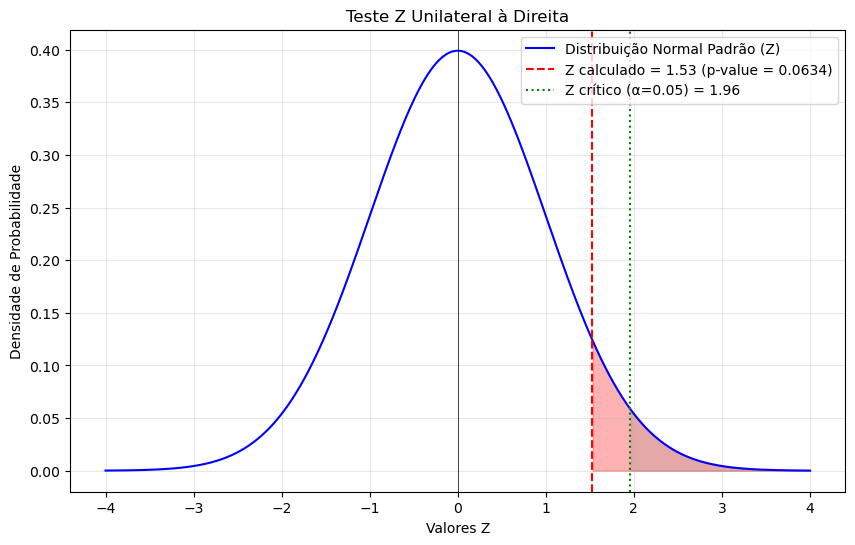

In [36]:
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)
plt.plot(x, y, label='Distribuição Normal Padrão (Z)', color='blue')
plt.axvline(x=z, color='red', linestyle='--', 
label=f'Z calculado = {z:.2f} (p-value = {p_value:.4f})')
plt.axvline(x=z_critico, color='green', linestyle=':', 
label=f'Z crítico (α={alpha}) = {z_critico:.2f}')
mask_pvalue = x > z
plt.fill_between(x[mask_pvalue], y[mask_pvalue], color='red', alpha=0.3)
mask_rejeicao = x > z_critico
plt.fill_between(x[mask_rejeicao], y[mask_rejeicao], color='gray', alpha=0.2)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Teste Z Unilateral à Direita')
plt.xlabel('Valores Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()